# **AI Project Cycle**



#**1.   Problem Scoping**

---
Menjelaskan mengenai latar belakang dari pembuatan AI Malnutrion Classfication






#**2.   Data Acquisition**

---
Sumber data diperoleh melalui github `https://github.com/sstevenadi/StuntingDataAnalysis.git`






#**3.   Data Exploration**

---
Tahapan ini masuk ke dalam tahapan preprocessing data


In [51]:
#Menampilkan Grafik
import matplotlib.pyplot as plt
import seaborn as sns

#Data Transformation
import pandas as pd
import numpy as np

#Membantu dalam pembuatan model dan mempersiapkan data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

#Model yang digunakan
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

#Model Clustering
from sklearn.cluster import KMeans

#Magic line untuk matplotlib
%matplotlib inline

In [2]:
#Membaca data
url = ('https://raw.githubusercontent.com/kilua762/malnutrition-classification/main/Data/Stunting.xlsx')
data_stunting = pd.read_excel(url)

In [ ]:
#Didalam data terdapat beberapa char non-ascii jadi di hilangkan dahulu
data_stunting = data_stunting.applymap(lambda x : x.replace('\xa0', '') if type(x) == str else x)

data_stunting.sample(10)

In [ ]:
#Melihat info data
data_stunting.info()

In [ ]:
#Melihat data yang tidak ada nilainya atau null
data_stunting.isna().sum()

In [6]:
# #Mengatasi data yang tidak ada nilainya
# data_stunting.dropna()

In [ ]:
#Melihat data presentase BB/U 
data_stunting['BB/U'].value_counts()/data_stunting.shape[0]*100

In [ ]:
#Melihat data presentase TB/U 
data_stunting['TB/U'].value_counts()/data_stunting.shape[0]*100

In [ ]:
#Melihat data presentase BB/TB
data_stunting['BB/TB'].value_counts()/data_stunting.shape[0]*100

In [ ]:
#Untuk mengubah data kategorical menjadi angka
le = LabelEncoder()

data_stunting['BB/U'] = le.fit_transform(data_stunting['BB/U']) #Kurang , Berat Badan Normal
data_stunting['TB/U'] = le.fit_transform(data_stunting['TB/U']) #Sangat Pendek, Pendek
data_stunting['BB/TB'] = le.fit_transform(data_stunting['BB/TB']) #Gizi Baik, Risiko Gizi Lebih

data_stunting.head()

In [ ]:
#Mengubah value 0 pada BB Lahir menjadi median
data_stunting['BB Lahir'] = pd.to_numeric(data_stunting['BB Lahir'])
data_stunting['BB Lahir'] = data_stunting['BB Lahir'].apply(lambda x : data_stunting['BB Lahir'].median() if x <= 0 else x)

data_stunting.head()

In [ ]:
#Mengubah value 0 pada TB Lahir menjadi median
data_stunting['TB Lahir'] = pd.to_numeric(data_stunting['TB Lahir'])
data_stunting['TB Lahir'] = data_stunting['TB Lahir'].apply(lambda x : data_stunting['TB Lahir'].median() if x <= 0 else x)
data_stunting['TB Lahir'].fillna(data_stunting['TB Lahir'].median(), inplace=True)

data_stunting.head()

In [ ]:
#Mengubah value usia menjadi sebuah angka
data_stunting['Usia Saat Ukur'] = data_stunting['Usia Saat Ukur'].apply(lambda x : float(x[0]))

data_stunting.head()

In [ ]:
#Memilih kolom yang mempengaruhi data
data_stunting = data_stunting[['BB Lahir', 'TB Lahir', 'Usia Saat Ukur', 'Berat', 'Tinggi', "BB/U", "TB/U", "BB/TB"]]

data_stunting.head()

#**4.   Cluster Data dengan K-Means**

---


In [ ]:
#perhitungan cluster dengan k-means dan visualisasi dengan metode ELBOW
X_means = data_stunting.iloc[: ,[3, 4]].values

wcss = []
for i in range (1,11) :
  kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_means)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('wcss')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


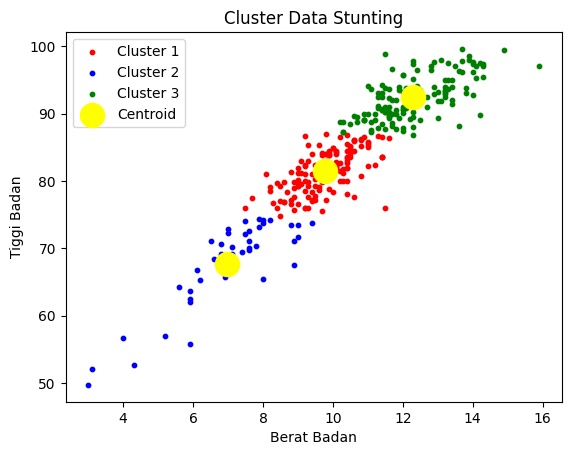

In [33]:
#Melihat Hasil Cluster dengan membaginya menjadi 3 Cluster
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=42)
Y_kmeans = kmeans.fit_predict(X_means)

plt.scatter(X_means[Y_kmeans == 0, 0], X_means[Y_kmeans == 0, 1], s = 10, c = 'red',  label = 'Cluster 1')
plt.scatter(X_means[Y_kmeans == 1, 0], X_means[Y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_means[Y_kmeans == 2, 0], X_means[Y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c ='yellow', label = 'Centroid')

plt.title('Cluster Data Stunting')
plt.xlabel('Berat Badan')
plt.ylabel('Tiggi Badan')
plt.legend()
plt.show()

In [17]:
#prediksi dengan membagi 3 Cluster
Y_predicted = KMeans(n_clusters = 3).fit_predict(data_stunting[['Berat','Tinggi']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [86]:
data_stunting['Cluster'] = Y_predicted
data_stunting.sample(10)

,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,BB/U,TB/U,BB/TB,Cluster
43,2.9,47.0,4.0,11.1,93.6,2,0,1,2
9,3.0,47.0,3.0,12.0,90.1,0,0,0,2
159,2.6,46.0,2.0,9.7,79.8,1,1,0,0
150,3.0,47.0,3.0,13.4,94.0,0,0,0,2
243,2.8,48.0,1.0,9.0,73.5,0,1,0,1
32,2.9,47.0,2.0,9.0,79.3,1,0,0,0
196,3.0,49.0,3.0,11.6,89.7,0,0,0,2
208,2.7,47.0,4.0,13.4,95.0,1,0,0,2
298,2.8,49.0,1.0,7.7,77.5,2,0,1,0
106,2.5,47.0,3.0,11.3,90.9,1,0,0,2


In [26]:
#Export File to .csv
data_stunting.to_csv("StuntingCluster.csv")

#**5.   Modeling**

---


In [30]:
# Membaca data
df = pd.read_csv('StuntingCluster.csv')
# Menghapus kolom Unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# show data sebanyak 5
df.head(5)

,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,BB/U,TB/U,BB/TB,Cluster
0,2.9,48.0,4.0,11.2,89.0,1,1,0,2
1,2.8,47.0,4.0,14.2,89.8,0,1,3,2
2,2.8,47.0,3.0,11.4,90.6,1,0,0,2
3,2.8,47.0,4.0,12.3,97.8,1,0,0,2
4,2.8,47.0,3.0,12.1,90.8,0,0,0,2


In [59]:
# Melihat persentase cluster
df['Cluster'].value_counts()/df.shape[0]*100

2    44.37299
0    42.44373
1    13.18328
Name: Cluster, dtype: float64

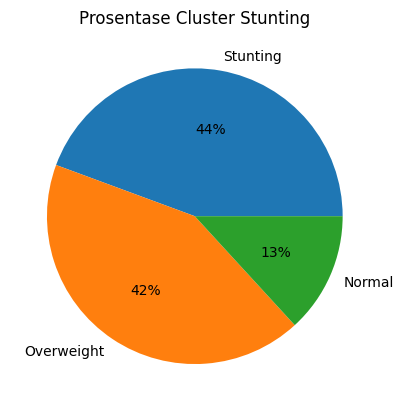

In [58]:
# Membuat visualisasi plot prosentasi cluster
labels = ['Stunting', 'Overweight', 'Normal']
values = df['Cluster'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Prosentase Cluster Stunting')
plt.show()

In [80]:
# Inisialisasi data and target
target = df['Cluster']
features = df.drop(['Cluster'], axis = 1)

In [81]:
# Membagi data menjadi training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

Untuk Penggunaan Model Machine Learning

*   Support Vector Machine
*   Random Forest
*   MultinomialNB




In [82]:
# Train dan evaluasi model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train model
    model.fit(train_features, y_train)
    
    # Test model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [83]:
# Inisialisasi models
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
mnb = MultinomialNB()


# evaluasi models
results = {}
for cls in [sv, rf, mnb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)
    

In [67]:
# Melihat hasil classifiers 
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       1.00      0.62      0.77         8
           2       1.00      1.00      1.00        26

    accuracy                           0.95        63
   macro avg       0.97      0.88      0.91        63
weighted avg       0.96      0.95      0.95        63


confusion_matrix :
[[29  0  0]
 [ 3  5  0]
 [ 0  0 26]]

-----

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      1.00      1.00         8
           2       1.00      0.96      0.98        26

    accuracy                           0.98        63
   macro avg       0.99      0.99      0.99        63
weighted avg       0.98      0.98      0.98        63


confusion_matrix :
[[29  0  0]
 [ 0  8  0]
 [ 1  0 25]]

-----

MultinomialNB

classification_r

#**6.   Testing**

---

In [88]:
#Melakukan testing pada model

#menginputkan paramter dengan urutan column pada dataset variabel x
mysample = np.array([2.8,	48.0,	1.0,	9.0,	73.5,	0,	1,	0]).reshape(1,-1)

#melakukan prediksi 
predicted = rf.predict(mysample)
score = rf.predict_proba(mysample)

if predicted == 0 :
    result = 'Overweight'
    accuracy = str(score[0][1]*100)
elif predicted == 1 :
    result = 'Normal'
    accuracy = str(score[0][1]*100)
else:
    result = 'Stunting'
    accuracy = str(score[0][0]*100)
    
print('{0:.5}'.format(accuracy)+'%', 'kemungkinan anda', result,)

94.0% kemungkinan anda Normal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
